---
title: "Exemplo com quanteda - Aula 03"
format:
  html:
    toc: true
    toc-title: Sumário
    toc-location: left
    toc-depth: 4
    html-math-method: katex
    code-line-numbers: true
    css: aulas.css
---

* Notebook complementar para a [Aula 3](./aula-3.html)
* Responsável: Prof. Dr. Hugo Cristo Sant'Anna - [hugo.santanna@ufes.br](mailto:hugo.santanna@ufes.br)

## 1. Instalação e carregamento de pacotes

In [121]:
# instala pacotes
install.packages('quanteda')
install.packages('quanteda.textplots')
install.packages("stopwords")
install.packages('openxlsx')

# carrega pacotes
library(quanteda)
library(quanteda.textplots)
library(openxlsx)
library(stopwords)

# exibição de números decimais
options(scipen=9999)

# seleciona obras 1 a 2
obras <- read.xlsx('1870-1879.xlsx')
obras <- obras[1:2,]

## 2. Normalização

In [122]:
# converte para minúsculas
obras$texto <- char_tolower(obras$texto)

# tokeniza documento
obras.tokens <- tokens(
  # limites: palavras
  obras$texto,what="word",
  # remove pontuação
  remove_punct=TRUE
)

# remove stopwords da coleção
obras.tokens <- tokens_select(obras.tokens, selection="remove", pattern=stopwords("pt"))

# cria matriz de frequências dos documentos (dfm)
obras.dfm <- dfm(obras.tokens)

## 3. Métricas

### 3.1 Frequência absoluta (*f*)

In [123]:
# frequências absolutas do documento 1
obras.f <- dfm_weight(
    # seleciona dfm
    obras.dfm,
    # esquema: contagem (f)
    scheme="count"
  )

  # transforma em data.frame e exibe
  View(convert(obras.f,to="data.frame"))

### 3.2 Frequência relativa (*tf*)

In [124]:
# frequências absolutas do documento 1
obras.tf <- dfm_weight(
  # seleciona dfm
  obras.dfm,
  # esquema: contagem (tf)
  scheme="prop"
)

# transforma em data.frame e exibe
View(convert(obras.tf,to="data.frame"))

### 3.3 Inverso da frequência (*idf*)

In [125]:
# inverso da frequência (coleção)
obras.idf <- docfreq(
  # seleciona dfm
  obras.dfm,
  # esquema: inverso (idf)
  scheme="inverse"
)
# exibe 30 primeiras
print(head(obras.idf,n=30))

 falenas   índice     flor mocidade     fala    manhã  inverno       la marchesa  miramar  sombras 
 0.30103  0.00000  0.00000  0.00000  0.00000  0.30103  0.30103  0.00000  0.30103  0.30103  0.30103 
     ite    missa      est   ruínas     musa    olhos   verdes  noivado   elvira lágrimas     cera 
 0.30103  0.30103  0.30103  0.30103  0.30103  0.00000  0.00000  0.30103  0.30103  0.00000  0.30103 
  livros   flores pássaros    verme       un    vieux     pays      luz 
 0.30103  0.00000  0.30103  0.30103  0.30103  0.30103  0.30103  0.30103 


### 3.4 Importância dos termos

In [126]:
# tf-idf
obras.tfidf <- dfm_tfidf(
  # seleciona dfm
  obras.dfm, 
  # esquema: tf*idf
  scheme_tf = "prop"
)

# exibe
View(convert(obras.tfidf,to="data.frame"))

### 3.5 Identificando termos com alto *tf.idf*

In [127]:
# ordena dfm 1
print(dfm_sort(obras.tfidf[1,]))

Document-feature matrix of: 1 document, 3,285 features (41.64% sparse) and 0 docvars.
       features
docs          cleon      lísias       mirto       folhas          vão      sombras          luz
  text1 0.004244548 0.003828416 0.003578736 0.0009987172 0.0009987172 0.0009154907 0.0009154907
       features
docs            bela        terra            ó
  text1 0.0007490379 0.0007490379 0.0007490379
[ reached max_nfeat ... 3,275 more features ]


### 3.6 Explorando termo específico na coleção

In [128]:
# verifica frequência do termo na coleção
print(obras.tf[,"cleon"])

Document-feature matrix of: 2 documents, 1 feature (50.00% sparse) and 0 docvars.
       features
docs         cleon
  text1 0.01410008
  text2 0         


In [129]:
# verifica idf do termo na coleção
print(obras.idf["cleon"])

  cleon 
0.30103 


In [130]:
# verifica tf.idf do termo na coleção
print(obras.tfidf[,"cleon"])

Document-feature matrix of: 2 documents, 1 feature (50.00% sparse) and 0 docvars.
       features
docs          cleon
  text1 0.004244548
  text2 0          


## 4. Nuvem de palavras de frequência absoluta

### 4.1 Coleção completa

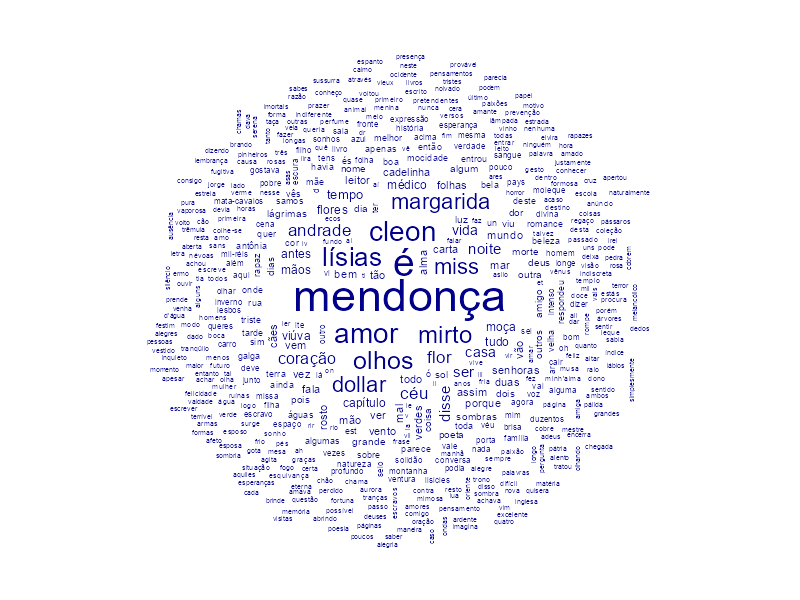

In [131]:
# nuvem de palavras da coleção
textplot_wordcloud(obras.dfm)

### 4.2 Obra específica

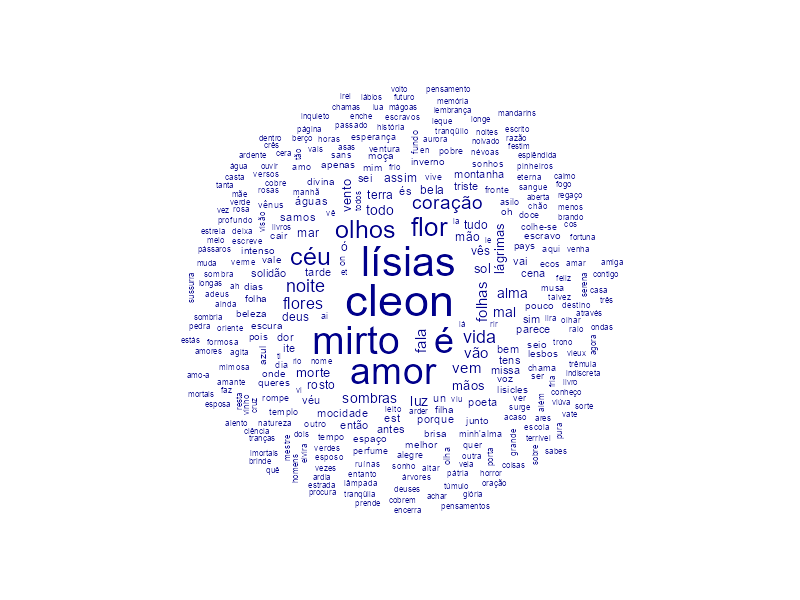

In [132]:
# nuvem de palavras do documento 1
textplot_wordcloud(obras.dfm[1,])

##